# Covariate ROC from Vandas Code

In this code, we create ROC curves from data. In the first section we use the assumption of normality to plot the binormal ROC, then in the second section we relax this assumption and plot the empirical ROC curve.

The steps for fitting the AUC over covariate values from data are:

Step 1: Fit the models to the data
- Split the data into diseased and non-diseased
- Fit linear models to the diseased and non-diseased data
- Calculate the estimate of sigma from the linear models $\hat{\sigma}_h$ and $\hat{\sigma}_d$ (That is, the parameters to input into the ROC model)

Step 2: Find ROCs and AUCs
- For each value of the covariate (age):
    - Use the linear models to predict marker value for diseased and non-diseased
    - Calculate the ROC curve from the predictions $\hat{\mu}_h$, $\hat{\mu}_d$, $\hat{\sigma}_h$ and $\hat{\sigma}_d$
    - Calculate the AUC for that ROC
    
Finally, we have an estimated ROC for each value of the covariate and corresponding AUCs. We can either plot the AUC over values of the covariate or plot the ROC for a given value of the covariate.

# Binormal ROC


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

Now we begin by loading the data 

In [2]:
diabetes_data = np.loadtxt('C:/Mark/uni/Uni Work/5th Year/Diss/Coding ROC Curves in Python Diabetes/DiabetesData.csv',
                       dtype=float,
                       delimiter=',',
                       skiprows=1)

# Create healthy and diseased segements of the data
yh = diabetes_data[diabetes_data[:,1] == 0]
yd = diabetes_data[diabetes_data[:,1] == 1]

This is what the data looks like raw, these are the first 10 rows of 286 observations. Data is organised Marker value, disease status, age. 

In [3]:
print(diabetes_data[0:10], len(diabetes_data))

[[ 82.   0.  37.]
 [112.   0.  47.]
 [ 82.   0.  20.]
 [ 87.   1.  51.]
 [ 80.   0.  54.]
 [132.   1.  48.]
 [113.   1.  49.]
 [207.   1.  63.]
 [186.   1.  70.]
 [121.   0.  62.]] 286


Now, lets plot the data by age and investigate the plots

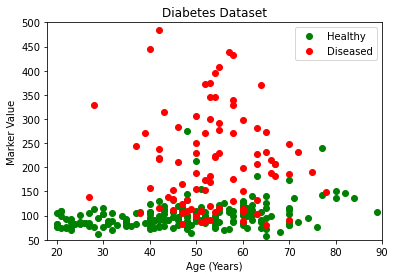

In [4]:
plt.plot(yh[:,2], yh[:,0], 'go', label='Healthy')
plt.plot(yd[:,2], yd[:,0], 'ro', label='Diseased')
plt.xlim(18,90)
plt.ylim(50,500)
plt.xlabel('Age (Years)')
plt.ylabel('Marker Value')
plt.title('Diabetes Dataset')
plt.legend()

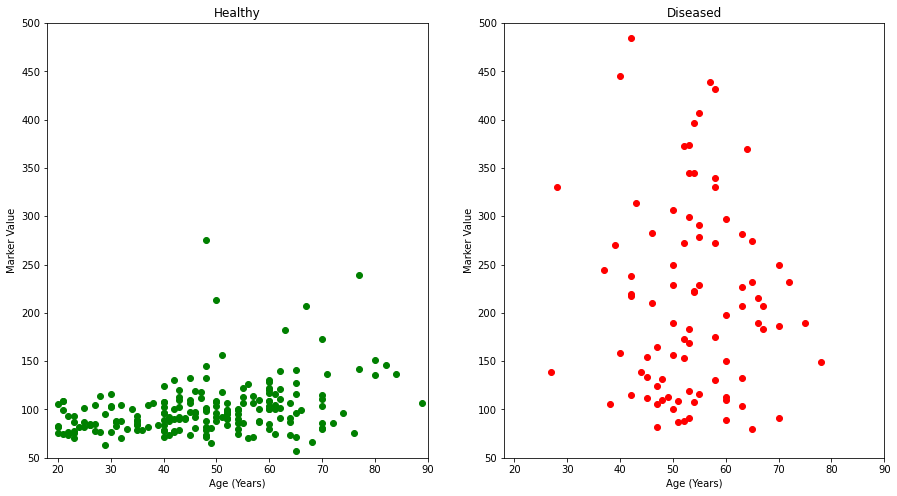

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

ax[0].plot(yh[:,2], yh[:,0], 'go')
ax[0].set_xlim(18,90)
ax[0].set_ylim(50,500)
ax[0].set_title('Healthy')

ax[1].plot(yd[:,2], yd[:,0], 'ro')
ax[1].set_xlim(18,90)
ax[1].set_ylim(50,500)
ax[1].set_title('Diseased')


for i in ax:
    i.set_xlabel('Age (Years)')
    i.set_ylabel('Marker Value')


Both of these plots show clearly higher marker values for the diseased population. Now we fit a linear model between the age and marker value for both populations.

In [6]:
from sklearn.linear_model import LinearRegression

# Pick out diseased and healthy
yh = diabetes_data[diabetes_data[:,1] == 0]
yd = diabetes_data[diabetes_data[:,1] == 1]

# Pick out only the marker values
yh_val = yh[:, 0]
yd_val = yd[:, 0]

# Pick out only the ages
xh = yh[:, 2]
xd = yd[:, 2]

# Reshape the data to work with sklearn
xh = xh.reshape(-1, 1)
yh_val = yh_val.reshape(-1, 1)
xd = xd.reshape(-1, 1)
yd_val = yd_val.reshape(-1, 1)

# Fit the linear model and find the parameters and the standard residual error for healthy
regh = LinearRegression().fit(xh, yh_val)
betah = [regh.intercept_[0], regh.coef_[0][0]]
# Calculate sigma hat
yh_hat = regh.predict(xh)
residualsh = yh_val - yh_hat
residual_sum_of_squaresh = residualsh.T @ residualsh
sigmah = np.sqrt(residual_sum_of_squaresh/(len(yh)-2))

# Fit the linear model and find the parameters and the standard residual error for diseased
regd = LinearRegression().fit(xd, yd_val)
betad = [regd.intercept_[0], regd.coef_[0][0],]
# Calculate sigma hat
yd_hat = regd.predict(xd)
residualsd = yd_val - yd_hat
residual_sum_of_squaresd = residualsd.T @ residualsd
sigmad = np.sqrt(residual_sum_of_squaresd/(len(yd)-2))

print(betah, betad, sigmad, sigmah)

[70.51224336675536, 0.6312666257417636] [232.36818713837727, -0.3705335453381036] [[100.13105316]] [[26.41526937]]


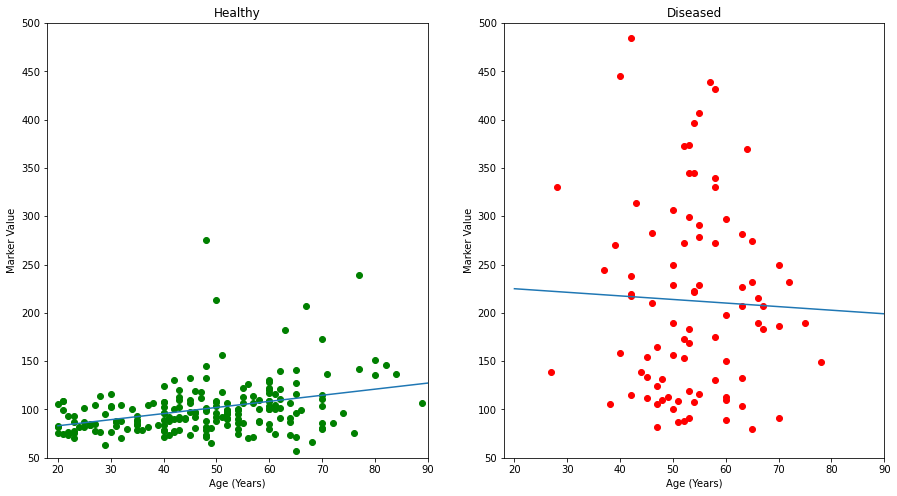

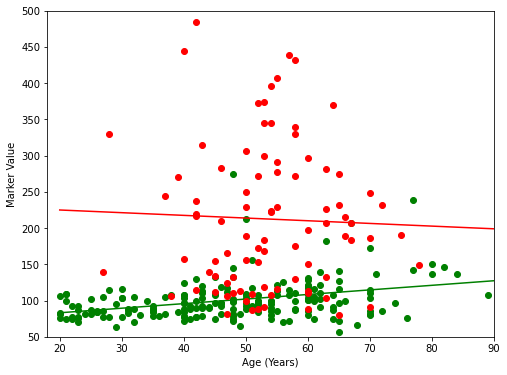

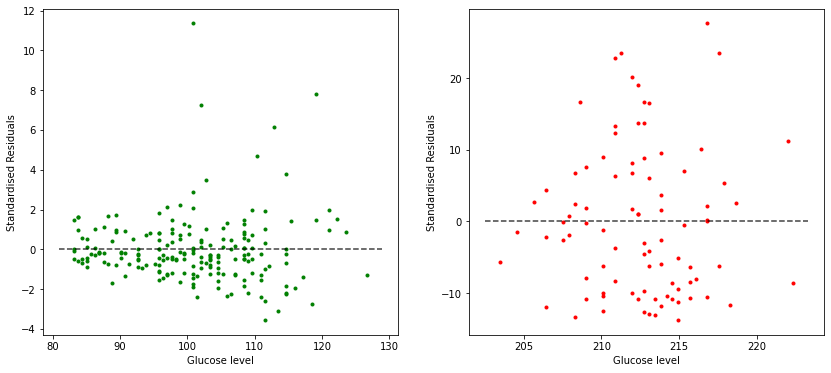

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

o = np.linspace(20,90,71).reshape(-1, 1)

ax[0].plot(yh[:,2], yh[:,0], 'go')
ax[0].plot(o, regh.predict(o))
ax[0].set_xlim(18,90)
ax[0].set_ylim(50,500)
ax[0].set_title('Healthy')

ax[1].plot(yd[:,2], yd[:,0], 'ro')
ax[1].plot(o, regd.predict(o))
ax[1].set_xlim(18,90)
ax[1].set_ylim(50,500)
ax[1].set_title('Diseased')


for i in ax:
    i.set_xlabel('Age (Years)')
    i.set_ylabel('Marker Value')
    
plt.figure(figsize=(8,6))
plt.xlabel('Age (Years)')
plt.ylabel('Marker Value')
plt.plot(yh[:,2], yh[:,0], 'go')
plt.plot(o, regh.predict(o), 'g')
plt.plot(yd[:,2], yd[:,0], 'ro')
plt.plot(o, regd.predict(o), 'r')
plt.xlim(18,90)
plt.ylim(50,500)

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].set_xlabel('Glucose level')
ax[0].set_ylabel('Standardised Residuals')
ax[0].plot(regh.predict(xh),residualsh/np.std(xh), 'g.')

ax[1].set_xlabel('Glucose level')
ax[1].set_ylabel('Standardised Residuals')
ax[1].plot(regd.predict(xd),residualsd/np.std(xd), 'r.')

for i in ax:
    minx, maxx = i.get_xlim()
    i.plot([minx,maxx],np.zeros(2), 'k--', alpha=0.75)


Now, we have fitted the two linear models, we wish to make a grid of ages of interest and make predictions over that grid. Note that we have the two equivalent forms for the ROC curve from equation 3.10 in section 3.4.1 - Both of which have the same AUC for each age.

`roc_now` uses the first equation here,

\begin{equation}
\begin{split}
    \hat{\text{ROC}}(t) & = \Phi \left(\frac{\hat{\mu}_D-\hat{\mu}_{\bar{D}}}{\hat{\sigma}_D}+ \frac{\hat{\sigma}_{\bar{D}}}{\hat{\sigma}_D} \Phi^{-1} (t)\right), \\
    & =  1 - \Phi \left(\frac{\hat{\mu}_{\bar{D}}-\hat{\mu}_{D}}{\hat{\sigma}_D}+ \frac{\hat{\sigma}_{\bar{D}}}{\hat{\sigma}_D} \Phi^{-1} (1-t)\right).
    \label{eqn:ROCBinom2Forms}
\end{split}
\end{equation}

and `roc_now2` uses the second equation above. We can then calculate the auc in two ways: using the binormal formula,

\begin{equation}
    \text{AUC}= \Phi \left( \frac{\hat{\mu}_D-\hat{\mu}_{\bar{D}}}{\sqrt{\hat{\sigma}_D^2 + \hat{\sigma}^2_\bar{D}}} \right) = \Phi \left(\frac{\hat{a}}{\sqrt{1+\hat{b}^2}}\right)
    \label{eqn:AUCbinomEstimate}
\end{equation}

or by considering the auc as the average TPF over all possible FPFs, which we do in `auc_now2` and `auc_now3` for the different roc curves `roc_now` and `roc_now2`

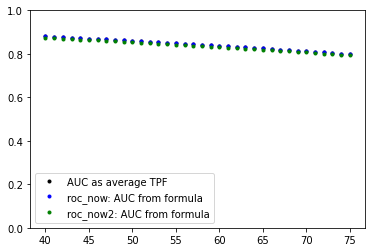

In [8]:
p = np.linspace(0,1,101)
age_grid = np.linspace(40,75,36)
Xpred = np.array([[1, i] for i in age_grid])
muh_pred = Xpred @ np.array(betah)
mud_pred = Xpred @ np.array(betad)

roc_age_est = []
auc_age_est = []

for i in range(len(age_grid)):
    a = (mud_pred[i] - muh_pred[i]) / sigmad[0][0]
    b = sigmah[0][0] / sigmad[0][0]
    
    # Find the ROC curve. roc_now is the ROC = 1- phi and roc_now2 is the ROC = Phi(a+b inv Phi)
    roc_now = [1-stats.norm.cdf(-a + b*stats.norm.ppf(1-j)) for j in p]
    roc_now2 = [stats.norm.cdf(a + b*stats.norm.ppf(j)) for j in p]
    
    auc_now = stats.norm.cdf(a/(np.sqrt(1+b**2))) # This is the formula for AUC under the binormal model
    auc_now2 = np.sum(roc_now)/len(roc_now)       # roc_now: AUC as average TPF over all FPFs
    auc_now3 = np.sum(roc_now2)/len(roc_now2)     # roc_now2: AUC as average TPF over all FPFs
    
    roc_age_est.append([roc_now, roc_now2])
    auc_age_est.append([auc_now, auc_now2, auc_now3])
 
auc_age_est = np.array(auc_age_est)
roc_age_est = np.array(roc_age_est)

plt.plot(age_grid, auc_age_est[:,0], 'k.', label='AUC as average TPF')
plt.plot(age_grid, auc_age_est[:,0], 'b.', label='roc_now: AUC from formula')
plt.plot(age_grid, auc_age_est[:,2], 'g.', label='roc_now2: AUC from formula')
plt.legend()
plt.ylim(0,1)
plt.show()

#plt.figure()
#plt.plot(p,roc_age_est[5])

Now, below we plot the AUC scores, the roc for the age 55 and we plot four ROC curves corresponding to the ages shown

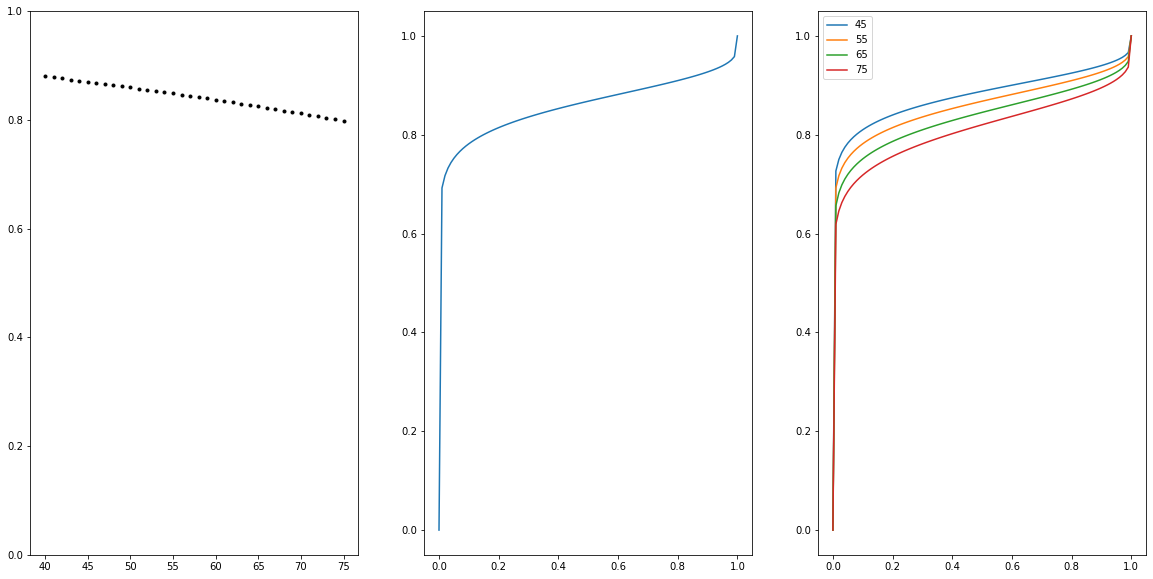

In [9]:
fig, ax = plt.subplots(1,3, figsize = (20,10))

ax[0].plot(age_grid, auc_age_est[:,0], 'k.', label='AUC as average TPF')
ax[0].set_ylim(0,1)

ax[1].plot(p, roc_age_est[10][1,:])

ax[2].plot(p, roc_age_est[0][1,:], label = "45")
ax[2].plot(p, roc_age_est[10][1,:], label = "55")
ax[2].plot(p, roc_age_est[20][1,:], label = "65")
ax[2].plot(p, roc_age_est[30][1,:], label = "75")
ax[2].legend()

# Empirical ROC

Above, we have to make the assumption that the distribution of marker values in the diseased and non-diseased populations are normally distributed. Let's investigate this assumption. First here are the linear models again:

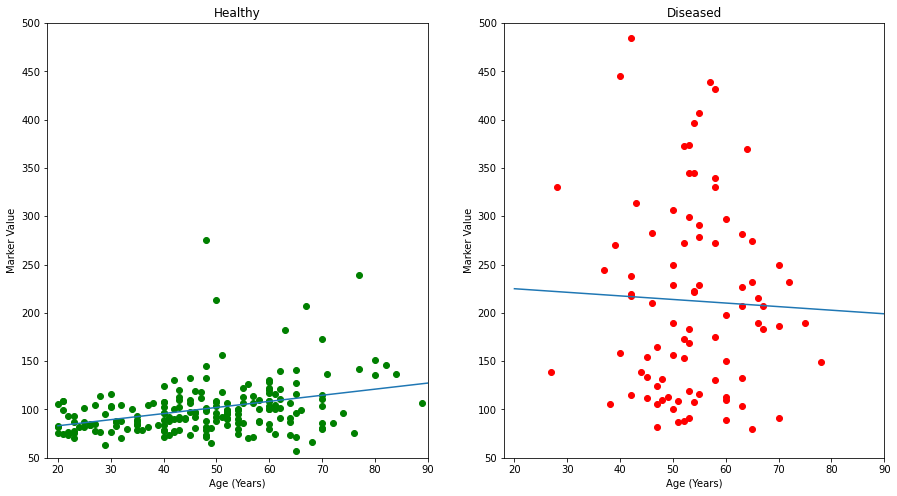

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

o = np.linspace(20,90,71).reshape(-1, 1)

ax[0].plot(yh[:,2], yh[:,0], 'go')
ax[0].plot(o, regh.predict(o))
ax[0].set_xlim(18,90)
ax[0].set_ylim(50,500)
ax[0].set_title('Healthy')

ax[1].plot(yd[:,2], yd[:,0], 'ro')
ax[1].plot(o, regd.predict(o))
ax[1].set_xlim(18,90)
ax[1].set_ylim(50,500)
ax[1].set_title('Diseased')


for i in ax:
    i.set_xlabel('Age (Years)')
    i.set_ylabel('Marker Value')

Let's Look at the histograms of the marker values, maybe our assumption of normality is not well made.

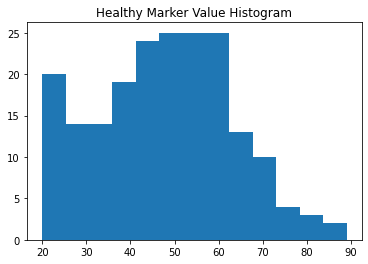

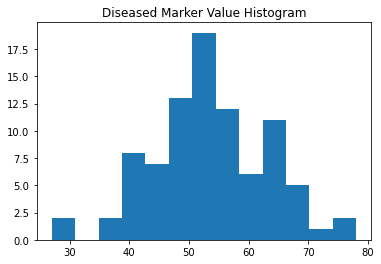

In [11]:
plt.hist(yh[:,2],bins=13)
plt.title('Healthy Marker Value Histogram')
plt.show()

plt.figure()
plt.hist(yd[:,2],bins=13)
plt.title('Diseased Marker Value Histogram')
plt.show()

Now, let's look at the residuals of the models. We calculated these manually earlier

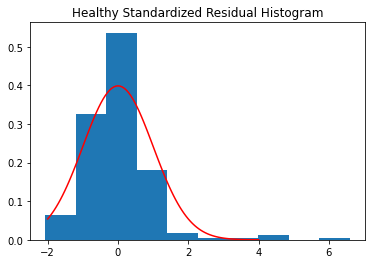

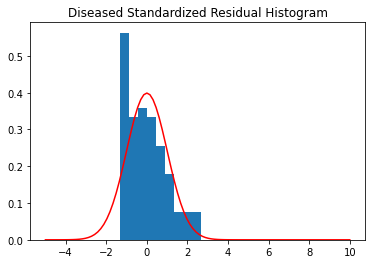

In [12]:
plt.hist(residualsh/sigmah[0][0], bins=10, density = True)
x = np.linspace(-2, 4, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-')
plt.title('Healthy Standardized Residual Histogram')
plt.show()

plt.figure()
x = np.linspace(-5, 10, 100)
plt.hist(residualsd/sigmad[0][0],bins=9, density = True)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-')
plt.title('Diseased Standardized Residual Histogram')
plt.show()

It appears to not be sensible to assume normality in our models. Let's use the empirical distribution instead. Now we repeat the above analysis, except this time we fit the empirical AUC instead of the binormal AUC.

Here are links for the [ECDF function](https://machinelearningmastery.com/empirical-distribution-function-in-python/) and R [Quantile](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/quantile) functions.

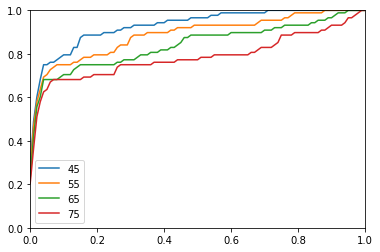

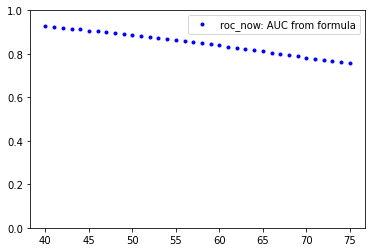

In [13]:
p = np.linspace(0,1,101)
age_grid = np.linspace(40,75,36)
Xpred = np.array([[1, i] for i in age_grid])
muh_pred = Xpred @ np.array(betah)
mud_pred = Xpred @ np.array(betad)

roc_age_est2 = []
roc2_age_est = []
auc_age_est = []
# Fit the ECDF to the standardised residuals of the diseased population

F_emp_D = ECDF([i[0] for i in residualsd/sigmad[0][0]])

for i in range(len(age_grid)):
    # Find ROC
    a = (mud_pred[i] - muh_pred[i]) / sigmad[0][0]
    b = sigmah[0][0] / sigmad[0][0]    
    
    roc_now = 1-F_emp_D(-a + b*np.quantile(residualsh/sigmah[0][0], q=1-p))
    #roc_now2 = F_emp_D(a + b*np.quantile(residualsh/sigmah[0][0], q=p)) # Not sure if this is correct
    
    # Code from R
    #   roc_age_est[, j] <- 1 - F_emp_d(((muh_pred[j] - mud_pred[j])/sigmad) +
    #                                (sigmah/sigmad)*quantile(fith$residuals/sigmah,type = 1, probs=1 - p))
    
    # Find AUC of ROC
    auc_now = np.sum(roc_now)/len(roc_now)       # roc_now: AUC as average TPF over all FPFs
    
    # Append to list of ROCs and AUCs
    roc_age_est2.append(roc_now)
    #roc2_age_est.append(roc_now2)
    auc_age_est.append([auc_now])
 
auc_age_est = np.array(auc_age_est)
roc_age_est2 = np.array(roc_age_est2)
#roc2_age_est = np.array(roc2_age_est)

#print(roc_age_est)
plt.plot(p, roc_age_est2[0,:], label = "45")
plt.plot(p, roc_age_est2[10,:], label = "55")
plt.plot(p, roc_age_est2[20,:], label = "65")
plt.plot(p, roc_age_est2[30,:], label = "75")
plt.legend()
plt.ylim(0,1)
plt.xlim(0,1)
# plt.plot(p, roc2_age_est[0,:], label = "45")
# plt.plot(p, roc2_age_est[10,:], label = "55")
# plt.plot(p, roc2_age_est[20,:], label = "65")
# plt.plot(p, roc2_age_est[30,:], label = "75")
# plt.legend()
# plt.ylim(0,1)
# plt.xlim(0,1)
plt.figure()

plt.plot(age_grid, auc_age_est[:,0], 'b.', label='roc_now: AUC from formula')
plt.legend()
plt.ylim(0,1)
plt.show()


Text(0, 0.5, 'TPF')

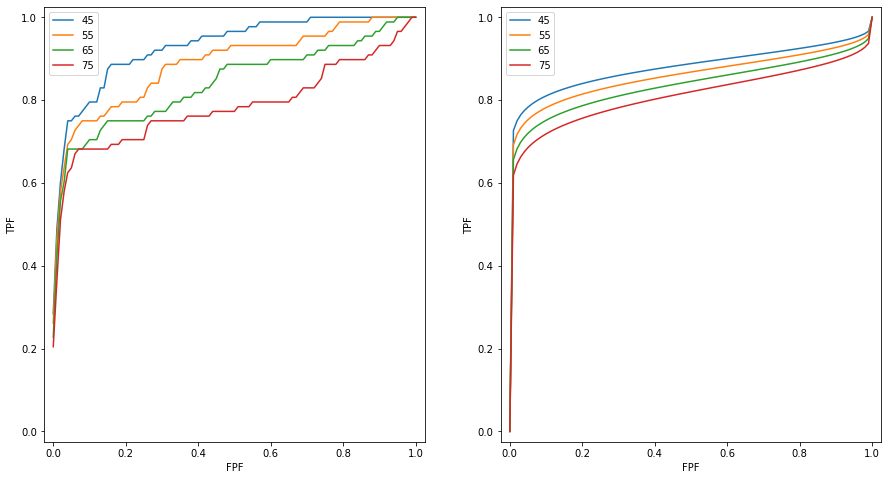

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

ax[0].plot(p, roc_age_est2[0,:], label = "45")
ax[0].plot(p, roc_age_est2[10,:], label = "55")
ax[0].plot(p, roc_age_est2[20,:], label = "65")
ax[0].plot(p, roc_age_est2[30,:], label = "75")
ax[0].legend()
ax[0].set_ylim(-0.025,1.025)
ax[0].set_xlim(-0.025,1.025)
ax[0].set_xlabel("FPF")
ax[0].set_ylabel("TPF")

ax[1].plot(p, roc_age_est[0][1,:], label = "45")
ax[1].plot(p, roc_age_est[10][1,:], label = "55")
ax[1].plot(p, roc_age_est[20][1,:], label = "65")
ax[1].plot(p, roc_age_est[30][1,:], label = "75")
ax[1].legend()
ax[1].set_ylim(-0.025,1.025)
ax[1].set_xlim(-0.025,1.025)
ax[1].set_xlabel("FPF")
ax[1].set_ylabel("TPF")

# Bootstrap - Empirical ROC

Now, we want to do the same but bootstrap also, to get a confidence interval for the AUCs above. This code creates 1000 random samples drawn from the data with replacement. It then fits regression models for both the diseased and non-diseased populations for each random sample, then finds the ROC for each age and AUC for that age.

In [15]:
from sklearn.linear_model import LinearRegression
import random

diabetes_data = np.loadtxt('C:/Mark/uni/Uni Work/5th Year/Diss/Coding ROC Curves in Python Diabetes/DiabetesData.csv',
                       dtype=float,
                       delimiter=',',
                       skiprows=1)

# Pick out diseased and healthy
yh = diabetes_data[diabetes_data[:,1] == 0]
yd = diabetes_data[diabetes_data[:,1] == 1]

# Pick out only the marker values
yh_val = yh[:, 0]
yd_val = yd[:, 0]

# Pick out only the ages
xh = yh[:, 2]
xd = yd[:, 2]

# Reshape the data to work with sklearn
xh = xh.reshape(-1, 1)
yh_val = yh_val.reshape(-1, 1)
xd = xd.reshape(-1, 1)
yd_val = yd_val.reshape(-1, 1)

# Fit the linear model and find the parameters and the standard residual error for healthy
regh = LinearRegression().fit(xh, yh_val)
betah = [regh.intercept_[0], regh.coef_[0][0]]
# Calculate sigma hat
yh_hat = regh.predict(xh)
residualsh = yh_val - yh_hat
residual_sum_of_squaresh = residualsh.T @ residualsh
sigmah = np.sqrt(residual_sum_of_squaresh/(len(yh)-2))

# Fit the linear model and find the parameters and the standard residual error for diseased
regd = LinearRegression().fit(xd, yd_val)
betad = [regd.intercept_[0], regd.coef_[0][0],]
# Calculate sigma hat
yd_hat = regd.predict(xd)
residualsd = yd_val - yd_hat
residual_sum_of_squaresd = residualsd.T @ residualsd
sigmad = np.sqrt(residual_sum_of_squaresd/(len(yd)-2))

p = np.linspace(0,1,101)
age_grid = np.linspace(40,75,36)
Xpred = np.array([[1, i] for i in age_grid])
muh_pred = Xpred @ np.array(betah)
mud_pred = Xpred @ np.array(betad)

roc_age_est_full_data = []
auc_age_est_full_data = []

for i in range(len(age_grid)):
    a = (mud_pred[i] - muh_pred[i]) / sigmad[0][0]
    b = sigmah[0][0] / sigmad[0][0]
    
    roc_now_full_data = 1-F_emp_D(-a + b*np.quantile(residualsh/sigmah[0][0], q=1-p))
    auc_now_full_data = np.sum(roc_now_full_data)/len(roc_now_full_data)       # roc_now: AUC as average TPF over all FPFs
    
    roc_age_est_full_data.append(roc_now_full_data)
    auc_age_est_full_data.append(auc_now_full_data)
 
auc_age_est_full_data = np.array(auc_age_est_full_data)
roc_age_est_full_data = np.array(roc_age_est_full_data)

"""
Bootstrapping Below
"""
AUCs = []
ROCs = []

for _ in range(1000):
    # Pick out diseased and healthy
    data_len = len(diabetes_data)
    random_data = np.array([diabetes_data[random.randint(0, data_len-1)] for _ in range(data_len)])
    
    yh = random_data[random_data[:,1] == 0]
    yd = random_data[random_data[:,1] == 1]

    # Pick out only the marker values
    yh_val = yh[:, 0]
    yd_val = yd[:, 0]

    # Pick out only the ages
    xh = yh[:, 2]
    xd = yd[:, 2]

    # Reshape the data to work with sklearn
    xh = xh.reshape(-1, 1)
    yh_val = yh_val.reshape(-1, 1)
    xd = xd.reshape(-1, 1)
    yd_val = yd_val.reshape(-1, 1)

    # Fit the linear model and find the parameters and the standard residual error for healthy
    regh = LinearRegression().fit(xh, yh_val)
    betah = [regh.intercept_[0], regh.coef_[0][0]]
    # Calculate sigma hat
    yh_hat = regh.predict(xh)
    residualsh = yh_val - yh_hat
    residual_sum_of_squaresh = residualsh.T @ residualsh
    sigmah = np.sqrt(residual_sum_of_squaresh/(len(yh)-2))

    # Fit the linear model and find the parameters and the standard residual error for diseased
    regd = LinearRegression().fit(xd, yd_val)
    betad = [regd.intercept_[0], regd.coef_[0][0],]
    # Calculate sigma hat
    yd_hat = regd.predict(xd)
    residualsd = yd_val - yd_hat
    residual_sum_of_squaresd = residualsd.T @ residualsd
    sigmad = np.sqrt(residual_sum_of_squaresd/(len(yd)-2))

    #print(betah, betad)
    p = np.linspace(0,1,101)
    age_grid = np.linspace(40,75,36)
    Xpred = np.array([[1, i] for i in age_grid])
    muh_pred = Xpred @ np.array(betah)
    mud_pred = Xpred @ np.array(betad)

    roc_age_est = []
    auc_age_est = []

    # Fit the ECDF to the standardised residuals of the diseased population

    F_emp_D = ECDF([i[0] for i in residualsd/sigmad[0][0]])

    for i in range(len(age_grid)):
        # Find ROC
        a = (mud_pred[i] - muh_pred[i]) / sigmad[0][0]
        b = sigmah[0][0] / sigmad[0][0]    

        roc_now = 1-F_emp_D(-a + b*np.quantile(residualsh/sigmah[0][0], q=1-p))
        #roc_now = [1-stats.norm.cdf(-a + b*stats.norm.ppf(1-j)) for j in p]
        
        # Find AUC of ROC
        auc_now = np.sum(roc_now)/len(roc_now)       # roc_now: AUC as average TPF over all FPFs

        # Append to list of ROCs and AUCs
        roc_age_est.append(roc_now)
        
        if auc_now < 0.5:
            auc_age_est.append([1-auc_now])
        else:
            auc_age_est.append([auc_now])
            
    roc_age_est = np.array(roc_age_est)
    auc_age_est = np.array(auc_age_est)
    
    ROCs.append(roc_age_est)
    AUCs.append(auc_age_est)

Here, we plot the AUCs of every one of the generated curves in blue and the AUC of the actual data in red. 

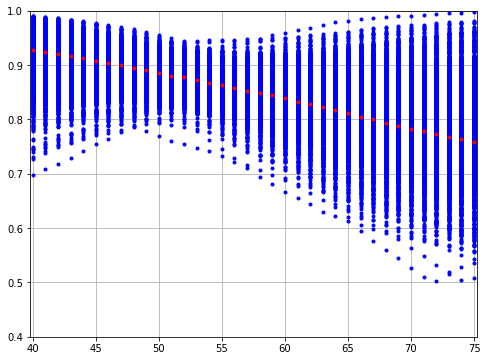

[0.92720522 0.92371737 0.9200045  0.91572907 0.91235374 0.90717822
 0.90312781 0.89941494 0.89491449 0.89007651 0.88523852 0.88062556
 0.87747525 0.87229973 0.86689919 0.86341134 0.85834833 0.85283528
 0.84822232 0.84417192 0.83843384 0.83247075 0.82740774 0.82313231
 0.81806931 0.81086859 0.805018   0.79984248 0.7939919  0.78791629
 0.7829658  0.77824032 0.77238974 0.76755176 0.76305131 0.75922592]


In [16]:
plt.figure(figsize=(8,6))
plt.ylim(0.4,1)
plt.xlim(39.8,75.2)
for i in AUCs:
    plt.plot(age_grid, i, 'b.')
plt.plot(age_grid,auc_age_est_full_data, 'r.')
plt.grid(visible=True)
plt.show()

print(auc_age_est_full_data)

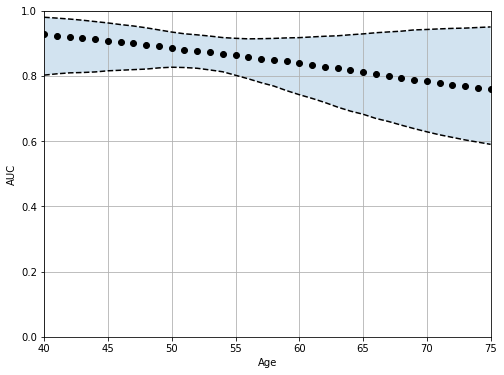

In [17]:
# 1000 bootstrapped samples of:
# - 36 ages  (36 ROC curves)
# - 101 TPFs (calculated TPF values)

#print(ROCs[:,0,0]) # All 
#print(ROCs[0,:,0])
#print(ROCs[0,0,:])

AUCs = np.array(AUCs)

AUC975s = []
AUC25s = []
AUCs_now = []

for i in range(len(age_grid)):
    AUCs_at_age_i = AUCs[:,i]
    
    AUC975 = stats.mstats.mquantiles(AUCs_at_age_i, 0.975)
    AUC25 = stats.mstats.mquantiles(AUCs_at_age_i, 0.025)

    AUC975s.append(AUC975)
    AUC25s.append(AUC25)

AUC25s = [i[0] for i in AUC25s]
AUC975s = [i[0] for i in AUC975s]

plt.figure(figsize=(8,6))
plt.plot(age_grid, AUC975s, 'k--')
plt.plot(age_grid, AUC25s, 'k--')
plt.fill_between(age_grid, AUC25s, AUC975s, alpha=0.2)
plt.plot(age_grid, auc_age_est_full_data, 'ko')
plt.grid(visible=True)
plt.xlim(40,75)
plt.xlabel('Age')
plt.ylabel('AUC')
plt.ylim(0,1)
plt.show()

## B-Spline Model - Wrong (See other file in Splines folder)

Now, we are going to model the data not with linear models as above, but rather with a B-Spline model that we can use to make predictions

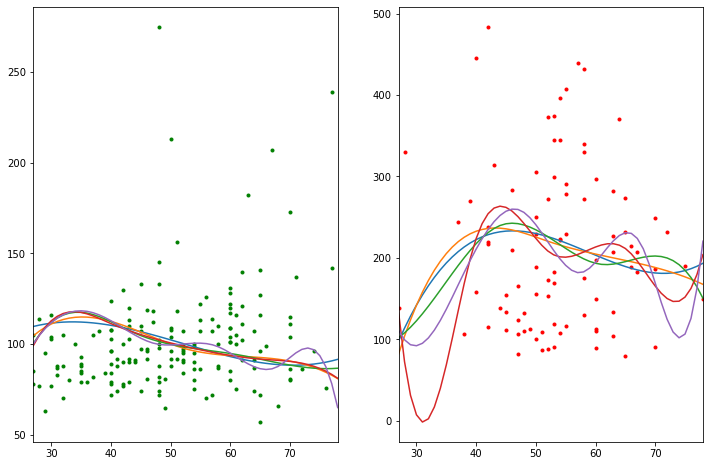

In [5]:
from sklearn.linear_model import LinearRegression
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpol

diabetes_data = np.loadtxt('C:/Mark/uni/Uni Work/5th Year/Diss/Coding ROC Curves in Python Diabetes/DiabetesData.csv',
                       dtype=float,
                       delimiter=',',
                       skiprows=1)

# Pick out diseased and healthy
yh = diabetes_data[diabetes_data[:,1] == 0]
yd = diabetes_data[diabetes_data[:,1] == 1]

yh = yh[yh[:,2] >= 27]
yh = yh[yh[:,2] <= 78]

yd = yd[yd[:,2] >= 27]
yd = yd[yd[:,2] <= 78]

# Pick out only the marker values
yh_val = yh[:, 0]
yd_val = yd[:, 0]

# Pick out only the ages
xh = yh[:, 2]
xd = yd[:, 2]

age_grid = np.linspace(27, 78, 78-27+1)

fig, ax = plt.subplots(1,2, figsize=(12,8))

ax[0].plot(xh, yh_val, 'g.')
ax[1].plot(xd, yd_val, 'r.')

numknots = 3

for i in range(1,6):
    t, c, k = interpol.splrep(np.sort(xh), yh_val, k=3, t=np.quantile(age_grid, np.linspace(0,1,i,endpoint=False)[1:]), task=-1)
    x_bs = interpol.BSpline(t, c, k)
    y_bs = [x_bs(i) for i in age_grid]
    #ax[0].plot(t, np.ones(len(t)), 'r.')
    ax[0].plot(age_grid, y_bs)
    ax[0].set_xlim(27, 78)

for i in range(1,6):
    t, c, k = interpol.splrep(np.sort(xd), yd_val, k=3, t=np.quantile(age_grid, np.linspace(0,1,i,endpoint=False)[1:]), task=-1)
    x_bs = interpol.BSpline(t, c, k)
    y_bs = [x_bs(i) for i in age_grid]
    ax[1].plot(age_grid, y_bs)
    ax[1].set_xlim(27, 78)

# # Reshape the data to work with sklearn
# xh = xh.reshape(-1, 1)
# yh_val = yh_val.reshape(-1, 1)
# xd = xd.reshape(-1, 1)
# yd_val = yd_val.reshape(-1, 1)
plt.show()


In [45]:
print(np.linspace(0,1,7,endpoint=False)[1:])

[0.14285714 0.28571429 0.42857143 0.57142857 0.71428571 0.85714286]


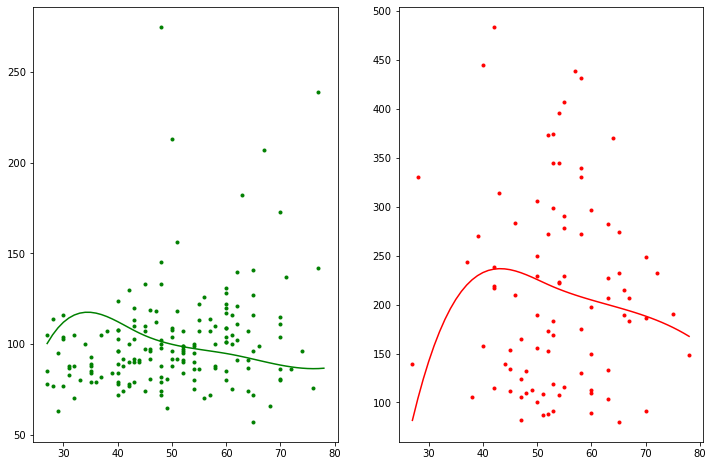

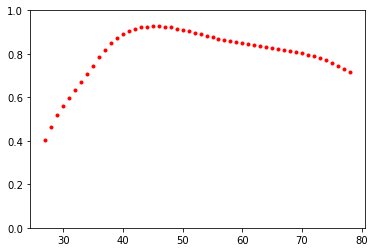

In [28]:
from sklearn.linear_model import LinearRegression
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpol

diabetes_data = np.loadtxt('C:/Mark/uni/Uni Work/5th Year/Diss/Coding ROC Curves in Python Diabetes/DiabetesData.csv',
                       dtype=float,
                       delimiter=',',
                       skiprows=1)

# Pick out diseased and healthy
yh = diabetes_data[diabetes_data[:,1] == 0]
yd = diabetes_data[diabetes_data[:,1] == 1]

yh = yh[yh[:,2] >= 27]
yh = yh[yh[:,2] <= 78]

yd = yd[yd[:,2] >= 27]
yd = yd[yd[:,2] <= 78]

# Pick out only the marker values
yh_val = yh[:, 0]
yd_val = yd[:, 0]

# Pick out only the ages
xh = yh[:, 2]
xd = yd[:, 2]

age_grid = np.linspace(27, 78, 78-27+1)

t, c, k = interpol.splrep(np.sort(xh), yh_val, k=3, t=np.quantile(age_grid, np.linspace(0,1,3,endpoint=False)[1:]), task=-1)
bs_h = interpol.BSpline(t, c, k)
y_bs_h = [bs_h(i) for i in age_grid]

t, c, k = interpol.splrep(np.sort(xd), yd_val, k=3, t=np.quantile(age_grid, np.linspace(0,1,2,endpoint=False)[1:]), task=-1)
bs_d = interpol.BSpline(t, c, k)
y_bs_d = [bs_d(i) for i in age_grid]
fig, ax = plt.subplots(1,2, figsize=(12,8))

ax[0].plot(age_grid, y_bs_h, 'g-')
ax[0].plot(xh, yh_val, 'g.')

ax[1].plot(age_grid, y_bs_d, 'r-')
ax[1].plot(xd, yd_val, 'r.')


plt.figure()
# Calculate sigma hat
yh_hat = bs_h(xh)
residualsh = yh_val - yh_hat
residual_sum_of_squaresh = residualsh.T @ residualsh
sigmah = np.sqrt(residual_sum_of_squaresh/(len(yh_val)-2))

# Calculate sigma hat
yd_hat = bs_d(xd)
residualsd = yd_val - yd_hat
residual_sum_of_squaresd = residualsd.T @ residualsd
sigmad = np.sqrt(residual_sum_of_squaresd/(len(yd_val)-2))

p = np.linspace(0,1,101)
#Xpred = np.array([[1, i] for i in age_grid])
muh_pred = np.array([bs_h(i) for i in age_grid])
mud_pred = np.array([bs_d(i) for i in age_grid])

roc_age_est_full_data = []
auc_age_est_full_data = []

F_emp_D = ECDF(residualsd/sigmad)

for i in range(len(age_grid)):
    a = (mud_pred[i] - muh_pred[i]) / sigmad
    b = sigmah / sigmad
    
    roc_now_full_data = 1-F_emp_D(-a + b*np.quantile(residualsh/sigmah, q=1-p))
    auc_now_full_data = np.sum(roc_now_full_data)/len(roc_now_full_data)       # roc_now: AUC as average TPF over all FPFs
    
    roc_age_est_full_data.append(roc_now_full_data)
    auc_age_est_full_data.append(auc_now_full_data)
 
auc_age_est_full_data = np.array(auc_age_est_full_data)
roc_age_est_full_data = np.array(roc_age_est_full_data)

plt.plot(age_grid, auc_age_est_full_data, 'r.')
plt.ylim(0,1)

plt.show()